In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
csvpath1 = "Data_Sets/weather_year.csv"

weather_df = pd.read_csv(csvpath1)
weather_df.head()

,Lat,Lon,Country,Sunlight,Temp,Cloud
0,-40.900557,174.885971,New Zealand,159695.75,64.508197,40.027322
1,-25.274398,133.775136,Australia,219802.26,83.819672,17.295082
2,-23.442503,-58.443832,Paraguay,192907.23,91.792350,27.598361
3,-20.348404,57.552152,Mauritius,119776.00,80.546448,54.882514
4,-18.766947,46.869107,Madagascar,178899.53,75.622951,32.445355


In [3]:
#rename columns to accurately describe data
weather_df = weather_df.rename(columns = {"Sunlight": "Total Minutes Sunlight/Year",
                                         "Temp": "Average Temp",
                                         "Cloud": "Average % Cloudcover",
                                         "Lat":"Latitude",
                                         "Lon": "Longitude"})
weather_df.head()

,Latitude,Longitude,Country,Total Minutes Sunlight/Year,Average Temp,Average % Cloudcover
0,-40.900557,174.885971,New Zealand,159695.75,64.508197,40.027322
1,-25.274398,133.775136,Australia,219802.26,83.819672,17.295082
2,-23.442503,-58.443832,Paraguay,192907.23,91.792350,27.598361
3,-20.348404,57.552152,Mauritius,119776.00,80.546448,54.882514
4,-18.766947,46.869107,Madagascar,178899.53,75.622951,32.445355


In [4]:
#import depression and happiness merged csv

csvpath2 = "Data_Sets/merged_whp_dep_coord.csv"
happy_dep_df = pd.read_csv(csvpath2)
happy_dep_df.head()

,Unnamed: 0,Country,Country Code,Latitude,Longitude,Happiness Rank 2015,Happiness Rank 2016,Happiness Rank 2017,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017,Percent Pop w Depression 2015,Percent Pop w Depression 2016,Average Happiness Score 2015-2017,Average % Pop w Depression 2015-2016
0,0,United Arab Emirates,AE,23.424076,53.847818,20,28,21,6.901,6.573,6.648,3.124907,3.128079,6.707333,3.126493
1,1,Afghanistan,AF,33.939110,67.709953,153,154,141,3.575,3.360,3.794,4.399010,4.404727,3.576333,4.401869
2,2,Albania,AL,41.153332,20.168331,95,109,109,4.959,4.655,4.644,2.450237,2.450883,4.752667,2.450560
3,3,Armenia,AM,40.069099,45.038189,127,121,121,4.350,4.360,4.376,3.057042,3.068547,4.362000,3.062795
4,4,Angola,AO,-11.202692,17.873887,137,141,140,4.033,3.866,3.795,4.716832,4.715467,3.898000,4.716149


In [5]:
#df with only relevant data to 2016

happy_dep_df = happy_dep_df[["Country",
                            "Country Code",
                            "Happiness Rank 2016",
                            "Happiness Score 2016",
                            "Percent Pop w Depression 2016"]]

happy_dep_df.head()

,Country,Country Code,Happiness Rank 2016,Happiness Score 2016,Percent Pop w Depression 2016
0,United Arab Emirates,AE,28,6.573,3.128079
1,Afghanistan,AF,154,3.360,4.404727
2,Albania,AL,109,4.655,2.450883
3,Armenia,AM,121,4.360,3.068547
4,Angola,AO,141,3.866,4.715467


In [6]:
#inner merge dataframes

intnl_2016_df = pd.merge(weather_df, happy_dep_df, on= "Country")
len(intnl_2016_df)

31

In [9]:
#reorder columns

intnl_2016_df = intnl_2016_df[["Country", "Country Code", "Latitude", "Longitude", "Happiness Rank 2016", "Happiness Score 2016",
                              "Percent Pop w Depression 2016", "Total Minutes Sunlight/Year", "Average % Cloudcover", "Average Temp"]]
intnl_2016_df.head()

,Country,Country Code,Latitude,Longitude,Happiness Rank 2016,Happiness Score 2016,Percent Pop w Depression 2016,Total Minutes Sunlight/Year,Average % Cloudcover,Average Temp
0,New Zealand,NZ,-40.900557,174.885971,8,7.334,4.766834,159695.75,40.027322,64.508197
1,Australia,AU,-25.274398,133.775136,9,7.313,4.949714,219802.26,17.295082,83.819672
2,Paraguay,PY,-23.442503,-58.443832,70,5.538,3.337950,192907.23,27.598361,91.792350
3,Mauritius,MU,-20.348404,57.552152,66,5.648,3.759575,119776.00,54.882514,80.546448
4,Madagascar,MG,-18.766947,46.869107,148,3.695,4.228448,178899.53,32.445355,75.622951


In [10]:
happiest_df = intnl_2016_df.nsmallest(10, "Happiness Rank 2016")
happiest_df

,Country,Country Code,Latitude,Longitude,Happiness Rank 2016,Happiness Score 2016,Percent Pop w Depression 2016,Total Minutes Sunlight/Year,Average % Cloudcover,Average Temp
24,Denmark,DK,56.263920,9.501785,1,7.526,3.432563,107237.95,62.248634,54.505464
21,Switzerland,CH,46.818188,8.227512,2,7.509,3.873037,148603.34,44.079235,47.188525
30,Iceland,IS,64.963051,-19.020835,3,7.501,3.582981,140076.70,50.781421,34.800546
28,Norway,NO,60.472024,8.468946,4,7.498,4.080700,138585.03,50.374317,40.010929
29,Finland,FI,61.924110,25.748151,5,7.413,5.193026,96231.91,69.920765,46.221311
23,Canada,CA,56.130366,-106.346771,6,7.404,3.998307,103660.63,63.978142,43.278689
22,Netherlands,NL,52.132633,5.291266,7,7.339,4.301588,126326.55,53.800546,58.428962
0,New Zealand,NZ,-40.900557,174.885971,8,7.334,4.766834,159695.75,40.027322,64.508197
1,Australia,AU,-25.274398,133.775136,9,7.313,4.949714,219802.26,17.295082,83.819672
27,Sweden,SE,60.128161,18.643501,10,7.291,4.966165,133907.62,55.267760,48.472678


In [11]:
unhappiest_df = intnl_2016_df.nlargest(10, "Happiness Rank 2016")
unhappiest_df

,Country,Country Code,Latitude,Longitude,Happiness Rank 2016,Happiness Score 2016,Percent Pop w Depression 2016,Total Minutes Sunlight/Year,Average % Cloudcover,Average Temp
7,Burundi,BI,-3.373056,29.918886,157,2.905,4.278357,200225.05,24.683060,77.581967
16,Syria,SY,34.802075,38.996815,156,3.069,3.874750,239481.90,11.286885,82.953552
10,Togo,TG,8.619543,0.824782,155,3.303,4.190313,189687.35,28.278689,96.349727
15,Afghanistan,AF,33.939110,67.709953,154,3.360,4.404727,231577.56,13.912568,52.568306
11,Benin,BJ,9.307690,2.315834,153,3.484,4.163982,183734.46,30.469945,97.557377
8,Rwanda,RW,-1.940278,29.873888,152,3.515,4.473851,196299.87,26.207650,82.538251
12,Guinea,GN,9.945587,-9.696645,151,3.607,4.067688,193411.69,26.939891,98.188525
9,Liberia,LR,6.428055,-9.429499,150,3.622,4.452349,135404.54,48.874317,91.740437
6,Tanzania,TZ,-6.369028,34.888822,149,3.666,4.176997,189145.42,28.808743,87.420765
4,Madagascar,MG,-18.766947,46.869107,148,3.695,4.228448,178899.53,32.445355,75.622951


In [12]:
meh_df = intnl_2016_df.loc[(intnl_2016_df["Happiness Rank 2016"] >= 64) & 
                     (intnl_2016_df["Happiness Rank 2016"] < 74)]
meh_df

,Country,Country Code,Latitude,Longitude,Happiness Rank 2016,Happiness Score 2016,Percent Pop w Depression 2016,Total Minutes Sunlight/Year,Average % Cloudcover,Average Temp
2,Paraguay,PY,-23.442503,-58.443832,70,5.538,3.337950,192907.23,27.598361,91.792350
3,Mauritius,MU,-20.348404,57.552152,66,5.648,3.759575,119776.00,54.882514,80.546448
5,Peru,PE,-9.189967,-75.015152,64,5.743,2.545436,167880.94,36.756831,97.300546
13,Jamaica,JM,18.109581,-77.297508,73,5.510,3.116690,161354.25,39.368852,89.387978
14,Libya,LY,26.335100,17.228331,67,5.615,4.122705,244992.11,8.576503,88.773224
17,Cyprus,CY,35.126413,33.429859,69,5.546,3.568676,227207.19,16.218579,82.275956
19,Turkmenistan,TM,38.969719,59.556278,65,5.658,3.134172,221204.67,18.551913,73.866120
20,Romania,RO,45.943161,24.966760,71,5.528,2.633073,156474.42,43.338798,61.653005
25,Latvia,LV,56.879635,24.603189,68,5.560,3.868747,123432.03,59.915301,51.972678
26,Estonia,EE,58.595272,25.013607,72,5.517,4.238939,109344.07,64.778689,49.185792


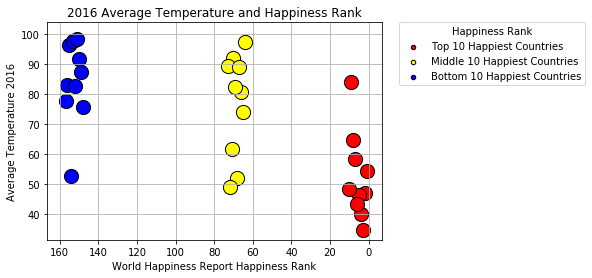

In [13]:
#scatterplot for temp/happiness rank
plt.scatter(happiest_df["Happiness Rank 2016"], happiest_df["Average Temp"], facecolors="red", edgecolors="black", s=200)
plt.scatter(meh_df['Happiness Rank 2016'], meh_df["Average Temp"], facecolors="yellow", edgecolors="black", s=200 )
plt.scatter(unhappiest_df['Happiness Rank 2016'], unhappiest_df["Average Temp"], facecolors="blue", edgecolors="black", s=200 )

plt.grid()


# Incorporate the other graph properties
plt.title("2016 Average Temperature and Happiness Rank")
plt.xlabel("World Happiness Report Happiness Rank")
plt.ylabel("Average Temperature 2016")

plt.gca().invert_xaxis()

# Create a legend
legend = plt.legend (('Top 10 Happiest Countries', 'Middle 10 Happiest Countries', 'Bottom 10 Happiest Countries'),
                     title = "Happiness Rank",
                     scatterpoints = 1,
                    bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

legend.legendHandles[0]._sizes = [20]
legend.legendHandles[1]._sizes = [20]
legend.legendHandles[2]._sizes = [20]


plt.grid(True)

plt.savefig("Images/Happiness_Temp.png")


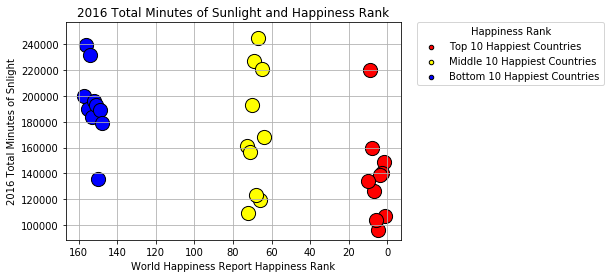

In [14]:
#scatterplot for Sunlight and Happiness Rank

plt.scatter(happiest_df["Happiness Rank 2016"], happiest_df["Total Minutes Sunlight/Year"], facecolors="red", edgecolors="black", s=200)
plt.scatter(meh_df['Happiness Rank 2016'], meh_df["Total Minutes Sunlight/Year"], facecolors="yellow", edgecolors="black", s=200 )
plt.scatter(unhappiest_df['Happiness Rank 2016'], unhappiest_df["Total Minutes Sunlight/Year"], facecolors="blue", edgecolors="black", s=200 )

plt.grid()

# Incorporate the other graph properties
plt.title("2016 Total Minutes of Sunlight and Happiness Rank")
plt.xlabel("World Happiness Report Happiness Rank")
plt.ylabel("2016 Total Minutes of Snlight")

plt.gca().invert_xaxis()

# Create a legend
legend = plt.legend (('Top 10 Happiest Countries', 'Middle 10 Happiest Countries', 'Bottom 10 Happiest Countries'),
                     title = "Happiness Rank",
                     scatterpoints = 1,
                    bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

legend.legendHandles[0]._sizes = [20]
legend.legendHandles[1]._sizes = [20]
legend.legendHandles[2]._sizes = [20]


plt.grid(True)

plt.savefig("Images/Happiness_Sunlight.png")

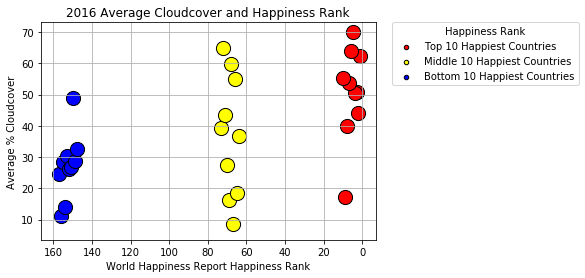

In [16]:
#scatterplot for Cloudiness and Happiness Rank

plt.scatter(happiest_df["Happiness Rank 2016"], happiest_df["Average % Cloudcover"], facecolors="red", edgecolors="black", s=200)
plt.scatter(meh_df['Happiness Rank 2016'], meh_df["Average % Cloudcover"], facecolors="yellow", edgecolors="black", s=200 )
plt.scatter(unhappiest_df['Happiness Rank 2016'], unhappiest_df["Average % Cloudcover"], facecolors="blue", edgecolors="black", s=200 )

plt.grid()

# Incorporate the other graph properties
plt.title("2016 Average Cloudcover and Happiness Rank")
plt.xlabel("World Happiness Report Happiness Rank")
plt.ylabel("Average % Cloudcover")

plt.gca().invert_xaxis()

# Create a legend
legend = plt.legend (('Top 10 Happiest Countries', 'Middle 10 Happiest Countries', 'Bottom 10 Happiest Countries'),
                     title = "Happiness Rank",
                     scatterpoints = 1,
                    bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

legend.legendHandles[0]._sizes = [20]
legend.legendHandles[1]._sizes = [20]
legend.legendHandles[2]._sizes = [20]


plt.grid(True)

plt.savefig("Images/Happiness_Clouds.png")

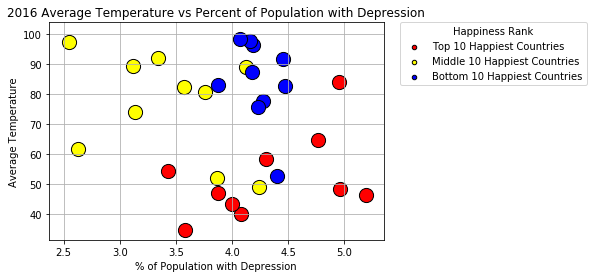

In [17]:
# scatterplot depression rates/temp

plt.scatter(happiest_df["Percent Pop w Depression 2016"], happiest_df["Average Temp"], facecolors="red", edgecolors="black", s=200)
plt.scatter(meh_df['Percent Pop w Depression 2016'], meh_df["Average Temp"], facecolors="yellow", edgecolors="black", s=200 )
plt.scatter(unhappiest_df['Percent Pop w Depression 2016'], unhappiest_df["Average Temp"], facecolors="blue", edgecolors="black", s=200 )

plt.grid()

# Incorporate the other graph properties
plt.title("2016 Average Temperature vs Percent of Population with Depression")
plt.xlabel("% of Population with Depression")
plt.ylabel("Average Temperature")

#plt.gca().invert_xaxis()

# Create a legend
legend = plt.legend (('Top 10 Happiest Countries', 'Middle 10 Happiest Countries', 'Bottom 10 Happiest Countries'),
                     title = "Happiness Rank",
                     scatterpoints = 1,
                    bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

legend.legendHandles[0]._sizes = [20]
legend.legendHandles[1]._sizes = [20]
legend.legendHandles[2]._sizes = [20]


plt.grid(True)

plt.savefig("Images/Depression_Temperature.png")

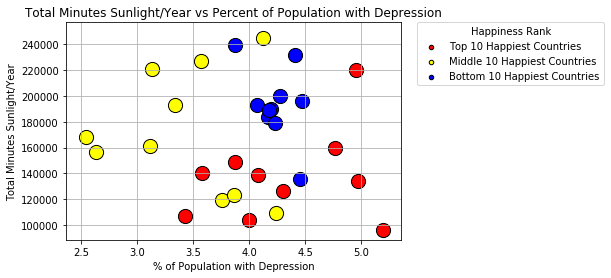

In [18]:
# scatterplot depression rates/sunlight

plt.scatter(happiest_df["Percent Pop w Depression 2016"], happiest_df["Total Minutes Sunlight/Year"], facecolors="red", edgecolors="black", s=200)
plt.scatter(meh_df['Percent Pop w Depression 2016'], meh_df["Total Minutes Sunlight/Year"], facecolors="yellow", edgecolors="black", s=200 )
plt.scatter(unhappiest_df['Percent Pop w Depression 2016'], unhappiest_df["Total Minutes Sunlight/Year"], facecolors="blue", edgecolors="black", s=200 )

plt.grid()

# Incorporate the other graph properties
plt.title("Total Minutes Sunlight/Year vs Percent of Population with Depression")
plt.xlabel("% of Population with Depression")
plt.ylabel("Total Minutes Sunlight/Year")

#plt.gca().invert_xaxis()

# Create a legend
legend = plt.legend (('Top 10 Happiest Countries', 'Middle 10 Happiest Countries', 'Bottom 10 Happiest Countries'),
                     title = "Happiness Rank",
                     scatterpoints = 1,
                    bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

legend.legendHandles[0]._sizes = [20]
legend.legendHandles[1]._sizes = [20]
legend.legendHandles[2]._sizes = [20]


plt.grid(True)

plt.savefig("Images/Depression_Sunlight.png")

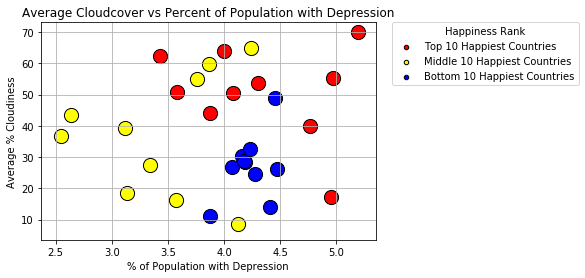

In [19]:
# scatterplot depression rates/cloudiness

plt.scatter(happiest_df["Percent Pop w Depression 2016"], happiest_df["Average % Cloudcover"], facecolors="red", edgecolors="black", s=200)
plt.scatter(meh_df['Percent Pop w Depression 2016'], meh_df["Average % Cloudcover"], facecolors="yellow", edgecolors="black", s=200 )
plt.scatter(unhappiest_df['Percent Pop w Depression 2016'], unhappiest_df["Average % Cloudcover"], facecolors="blue", edgecolors="black", s=200 )

plt.grid()

# Incorporate the other graph properties
plt.title("Average Cloudcover vs Percent of Population with Depression")
plt.xlabel("% of Population with Depression")
plt.ylabel("Average % Cloudiness")

#plt.gca().invert_xaxis()

# Create a legend
legend = plt.legend (('Top 10 Happiest Countries', 'Middle 10 Happiest Countries', 'Bottom 10 Happiest Countries'),
                     title = "Happiness Rank",
                     scatterpoints = 1,
                    bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

legend.legendHandles[0]._sizes = [20]
legend.legendHandles[1]._sizes = [20]
legend.legendHandles[2]._sizes = [20]


plt.grid(True)

plt.savefig("Images/Depression_Cloudiness.png")